In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division

plt.style.use('fivethirtyeight')
%matplotlib inline

N = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )


In [159]:
data_file = "./2016-FCC-New-Coders-Survey-Data.csv"

In [160]:
df = pd.read_csv(data_file)

In [161]:
head = df.head()
type(df.HasDebt.unique()[2])

numpy.float64

# Sample Size: 15620

In [162]:
n = len(df)

In [163]:
for col in df.columns:
    print col

Age
AttendedBootcamp
BootcampFinish
BootcampFullJobAfter
BootcampLoanYesNo
BootcampMonthsAgo
BootcampName
BootcampPostSalary
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventBootcamp
CodeEventCoffee
CodeEventConferences
CodeEventDjangoGirls
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWomenCode
CodeEventWorkshop
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
Gender
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDiabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobPref
JobRelocateYesNo
JobRoleInterest
JobRoleInterestOther
JobWherePref
LanguageAtHome
MaritalStatus
MoneyForLearning
Mon

# Age Distribution of learners

1. Symmetry: Positively skewed - most of the learners are in the age group of early twenties to early thirties.
2. Unimodal
3. Outliers: There are some senior citizens who are taking up online courses

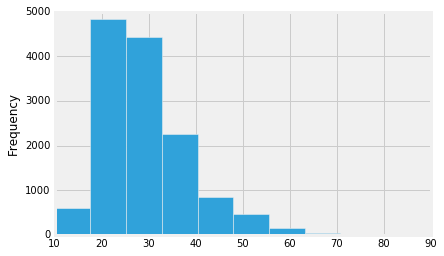

In [164]:
hist = df.Age.plot.hist()

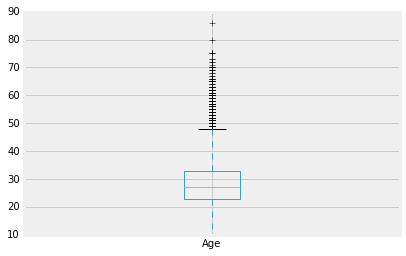

In [165]:
hist = df.Age.plot.box()

In [166]:
df.Age.describe()

count    13613.000000
mean        29.175421
std          9.017716
min         10.000000
25%         23.000000
50%         27.000000
75%         33.000000
max         86.000000
Name: Age, dtype: float64

## Proportion of people above the age of 50 taking up online learning: About 2%

In [167]:
len(df[df.Age > 50])/n

0.02733674775928297

## How many over the age of 50 have been in the military: About 0.6%

In [168]:
len(df[(df.Age > 50) & (df.HasServedInMilitary == True)])/n

0.006017925736235595

## Age distribution by Gender

### Female Age Distribution

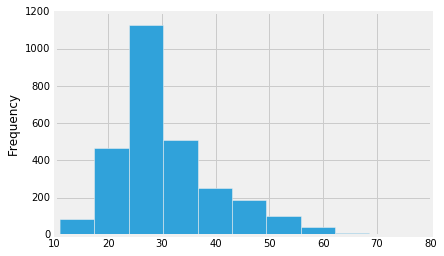

In [169]:
hist = df.Age[df.Gender == 'female'].plot.hist()

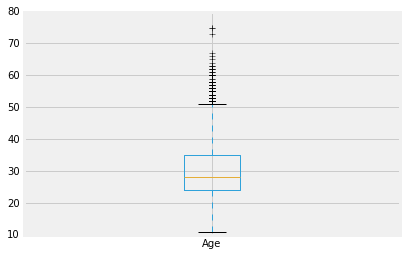

In [170]:
box = df.Age[df.Gender == 'female'].plot.box()

### Male Age Distribution

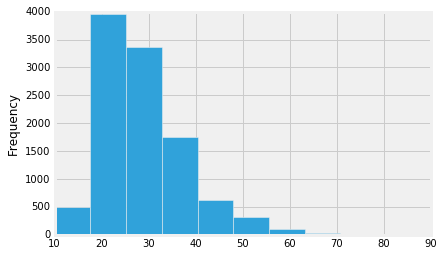

In [171]:
hist = df.Age[df.Gender == 'male'].plot.hist()

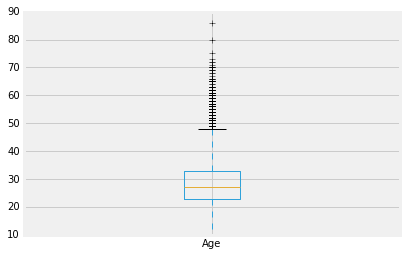

In [172]:
box = df.Age[df.Gender == 'male'].plot.box()

### Comparing Distribution of Males and Females

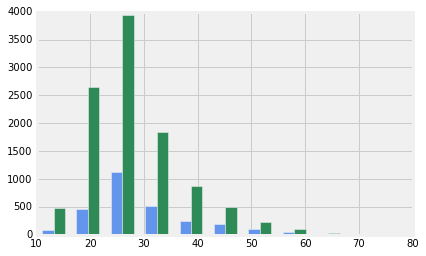

In [173]:
fig, ax = plt.subplots()

female_heights, female_bins = np.histogram(df[df.Gender == 'female']['Age'].dropna())
male_heights, male_bins = np.histogram(df[df.Gender == 'male']['Age'].dropna(), bins=female_bins)

width = (female_bins[1] - female_bins[0])/3

bar = ax.bar(female_bins[:-1], female_heights, width=width, facecolor='cornflowerblue')
bar = ax.bar(male_bins[:-1]+width, male_heights, width=width, facecolor='seagreen')

### Representation of Other Genders

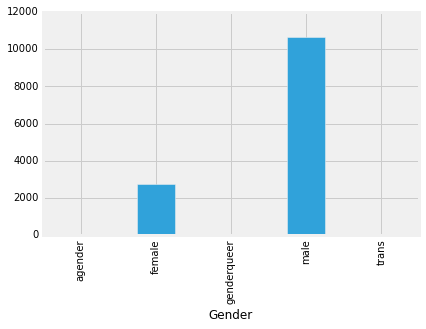

In [174]:
df[df.Age.notnull() == True].groupby(df.Gender).Age.size().plot.bar()

### Age Vs. Income

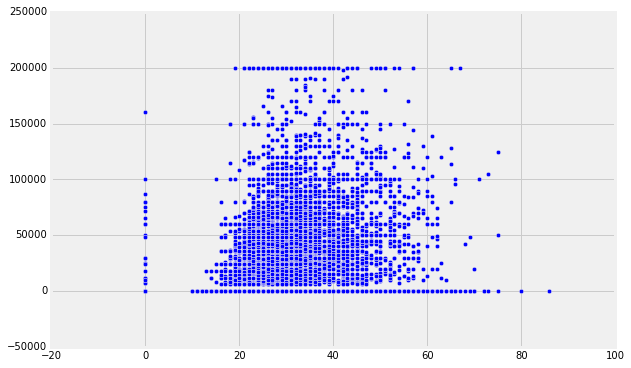

In [175]:
plt.scatter(df.Age.fillna(0), df.Income.fillna(0))
N = 1.5
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )

### Gender vs. Income

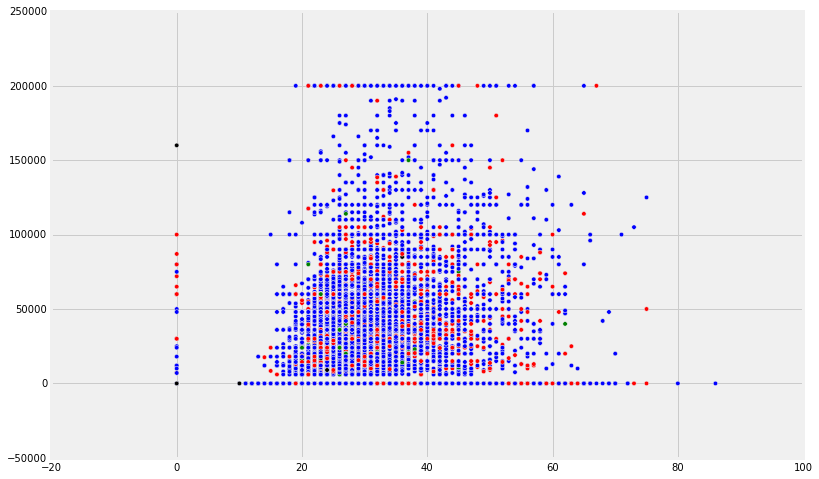

In [176]:
colors = {'male': 'blue', 'female': 'red', np.nan: 'black', 'genderqueer': 'green', 'trans': 'green', 'agender': 'green'}
plt.scatter(df.Age.fillna(0), df.Income.fillna(0), c=df['Gender'].apply(lambda x: colors[x]))
N = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )

# Learning Resources

## Most Popular Learning Resources

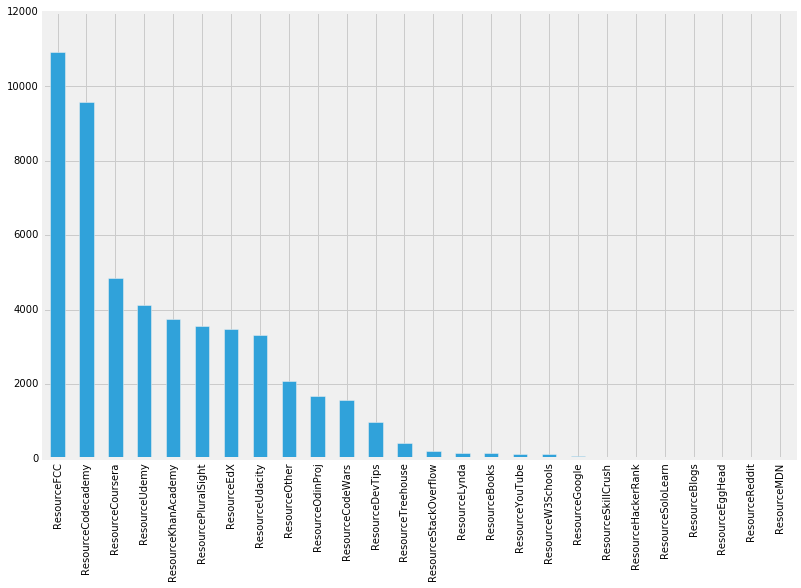

In [223]:
values = df[['ResourceBlogs',
'ResourceBooks',
'ResourceCodeWars',
'ResourceCodecademy',
'ResourceCoursera',
'ResourceDevTips',
'ResourceEdX',
'ResourceEggHead',
'ResourceFCC',
'ResourceGoogle',
'ResourceHackerRank',
'ResourceKhanAcademy',
'ResourceLynda',
'ResourceMDN',
'ResourceOdinProj',
'ResourceOther',
'ResourcePluralSight',
'ResourceReddit',
'ResourceSkillCrush',
'ResourceSoloLearn',
'ResourceStackOverflow',
'ResourceTreehouse',
'ResourceUdacity',
'ResourceUdemy',
'ResourceW3Schools',
'ResourceYouTube']].count()
N = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )

bar = values.sort_values(ascending=False).plot.bar()

## Most popular learning resources by High Speed internet Availability

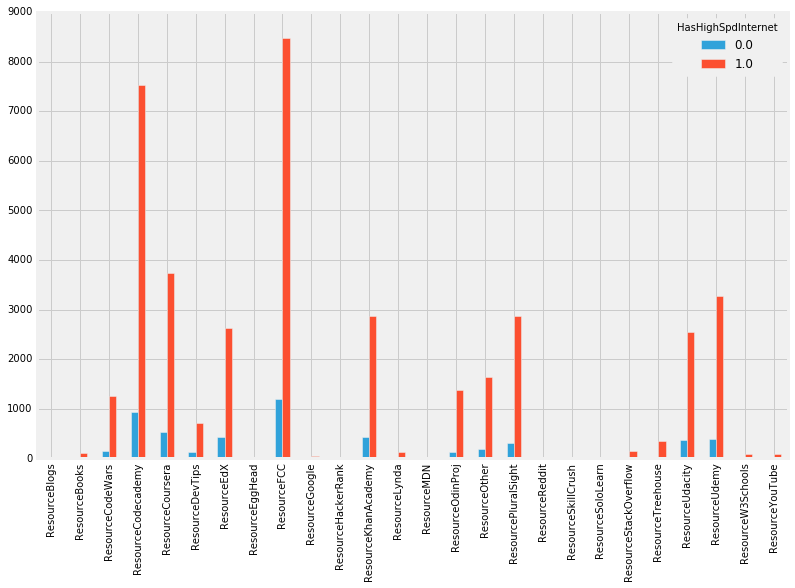

In [233]:
values = df[['ResourceBlogs',
'ResourceBooks',
'ResourceCodeWars',
'ResourceCodecademy',
'ResourceCoursera',
'ResourceDevTips',
'ResourceEdX',
'ResourceEggHead',
'ResourceFCC',
'ResourceGoogle',
'ResourceHackerRank',
'ResourceKhanAcademy',
'ResourceLynda',
'ResourceMDN',
'ResourceOdinProj',
'ResourceOther',
'ResourcePluralSight',
'ResourceReddit',
'ResourceSkillCrush',
'ResourceSoloLearn',
'ResourceStackOverflow',
'ResourceTreehouse',
'ResourceUdacity',
'ResourceUdemy',
'ResourceW3Schools',
'ResourceYouTube', 'HasHighSpdInternet']].groupby('HasHighSpdInternet').count()

values.unstack().unstack().plot.bar()
N = 2
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )


## Most Popular Learning Resources by Gender

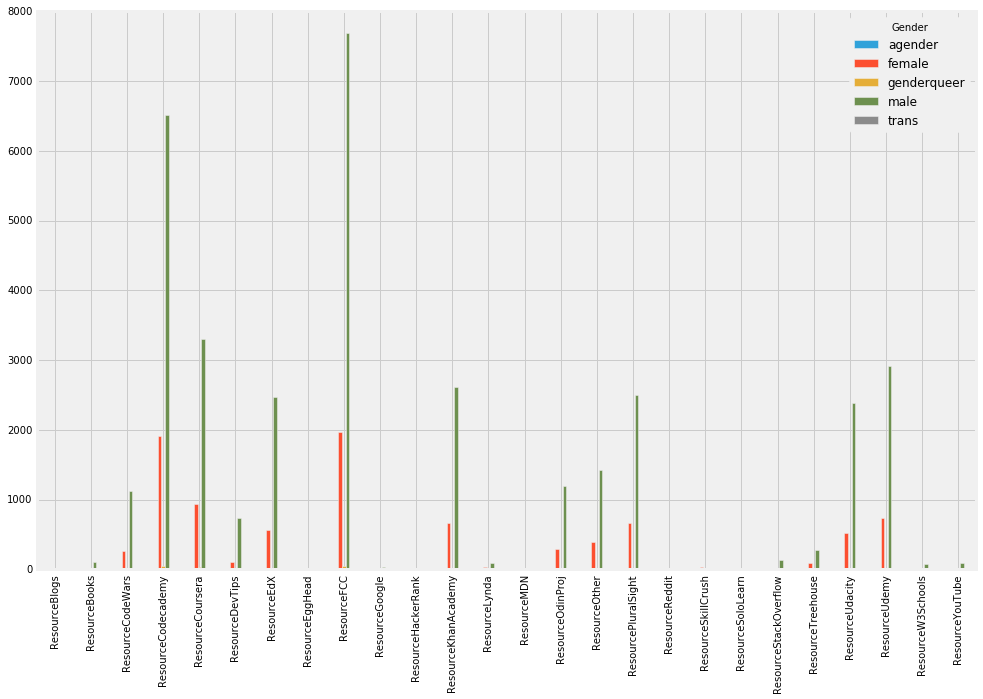

In [234]:
values = df[['ResourceBlogs',
'ResourceBooks',
'ResourceCodeWars',
'ResourceCodecademy',
'ResourceCoursera',
'ResourceDevTips',
'ResourceEdX',
'ResourceEggHead',
'ResourceFCC',
'ResourceGoogle',
'ResourceHackerRank',
'ResourceKhanAcademy',
'ResourceLynda',
'ResourceMDN',
'ResourceOdinProj',
'ResourceOther',
'ResourcePluralSight',
'ResourceReddit',
'ResourceSkillCrush',
'ResourceSoloLearn',
'ResourceStackOverflow',
'ResourceTreehouse',
'ResourceUdacity',
'ResourceUdemy',
'ResourceW3Schools',
'ResourceYouTube', 'Gender']].groupby('Gender').count()

values.unstack().unstack().plot.bar()
N = 2.5
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*N, plSize[1]*N) )